In [1]:
import serial.tools.list_ports
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ports = serial.tools.list_ports.comports()
for port, desc, hwid in sorted(ports):
    print("{}: {} [{}]".format(port, desc, hwid))

In [2]:
baud_rate = 115200 # this must match arduino config
port = "/dev/cu.usbserial-01D5ED4C"
ser = serial.Serial(port, baud_rate)

In [3]:
def shift_buffer(buf, el, full_len=50):
    """
    shifts all elements in a buffer down (idx -> idx - 1) and adds new element `el` to end of buffer.

    If full_len is given and the buffer is shorter than full_len, the el will just be appended without shifting others out.
    """
    is_np = isinstance(el, np.ndarray)
    if not is_np:
        el = np.array(el)
        
    if full_len is not None and len(buf) < full_len:
        result = np.append(buf, el)
    else:
        result = np.append(np.roll(buf, -1)[:-1], el)
    if is_np: # match return type to input buf type
        return result
    return result.tolist()  

In [22]:

def update_line(fig, new_data):
    fig.set_xdata(np.linspace(400, 800, len(new_data)))
    fig.set_ydata(new_data)
    plt.draw()

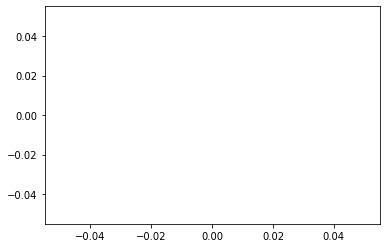

In [24]:
convert_bytes = lambda bstr: [x for x in bstr]

data = []
fig, = plt.plot([], [])

ser.open()

for t in range(5):
    sample = convert_bytes(ser.readline())
    data = shift_buffer(data, sample)
    update_line(fig, sample)
    time.sleep(1)


In [4]:
import matplotlib.animation as animation
from matplotlib import style

<IPython.core.display.Javascript object>


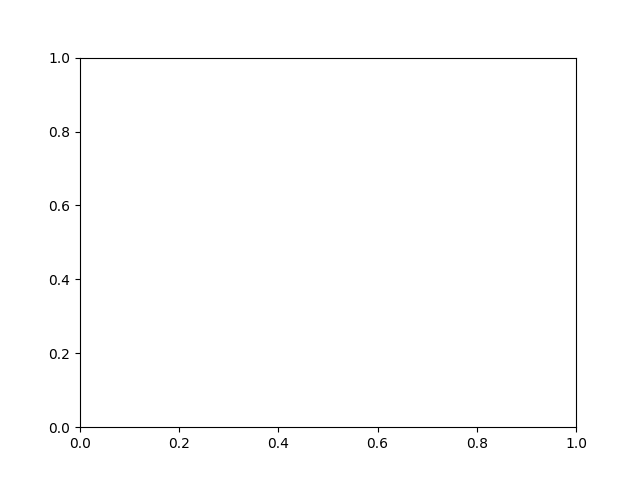

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = [] #store trials here (n)
ys = [] #store relative frequency here
rs = [] #for theoretical probability

# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    #Aquire and parse data from serial port
    sample = convert_bytes(ser.readline())
    # Add x and y to lists
    xs.append(i)
    ys.append(sample[50])
    rs.append(0.5)

    # Limit x and y lists to 20 items
    #xs = xs[-20:]
    #ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys, label="Experimental Probability")
    ax.plot(xs, rs, label="Theoretical Probability")

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('This is how I roll...')
    plt.ylabel('Relative frequency')
    plt.legend()
    plt.axis([1, None, 0, 1.1]) #Use for arbitrary number of trials
    #plt.axis([1, 100, 0, 1.1]) #Use for 100 trial demo

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=300)
plt.show()